# JS14- Convolutional Neural Network

Hanif Faishal Hilmi

TI-3F

## Lab 1
Klasifikasi Cats vs Dogs

### Langkah 1 - Import Library

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Langkah 2 - Pra Pengolahan Data

#### Langkah 2.1 - Pra Pengolahan Data Training

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


#### Langkah 2.2. Pra Pengolahan Data Testing

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


### Langkah 3 - Pembuatan Model CNN

#### Langkah 3.1 - Inisiasi Model CNN

In [5]:
cnn = tf.keras.models.Sequential()

#### Langkah 3.2 - Pembuatan Layer Konvolusi 1

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

c:\Users\HANIF FAISHAL HILMI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Langkah 3.3 - Pembuatan Layer Pooling 1

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.5 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

#### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Langkah 3.8 - Compile Model CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 4 - Fit CNN

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.5763 - loss: 0.6767 - val_accuracy: 0.6745 - val_loss: 0.6286
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.6478 - loss: 0.6277 - val_accuracy: 0.6935 - val_loss: 0.5860
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.6959 - loss: 0.5815 - val_accuracy: 0.7235 - val_loss: 0.5495
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7171 - loss: 0.5506 - val_accuracy: 0.7450 - val_loss: 0.5342
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.7394 - loss: 0.5261 - val_accuracy: 0.7555 - val_loss: 0.5174
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7515 - loss: 0.5078 - val_accuracy: 0.7770 - val_loss: 0.4986
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.7638 - loss: 0.4819 - val_accuracy: 0.7475 - val_loss: 0.5264
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.7774 - loss: 0.4601 - 

### Langkah 5 - Prediksi dengan 1 Citra

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
dog


## Lab 2
Klasifikasi Multilabel dengan dataset CIFAR

### Langkah 1 - Load Library

In [17]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 649s 4us/step


### Langkah 3 - Verifikasi Data

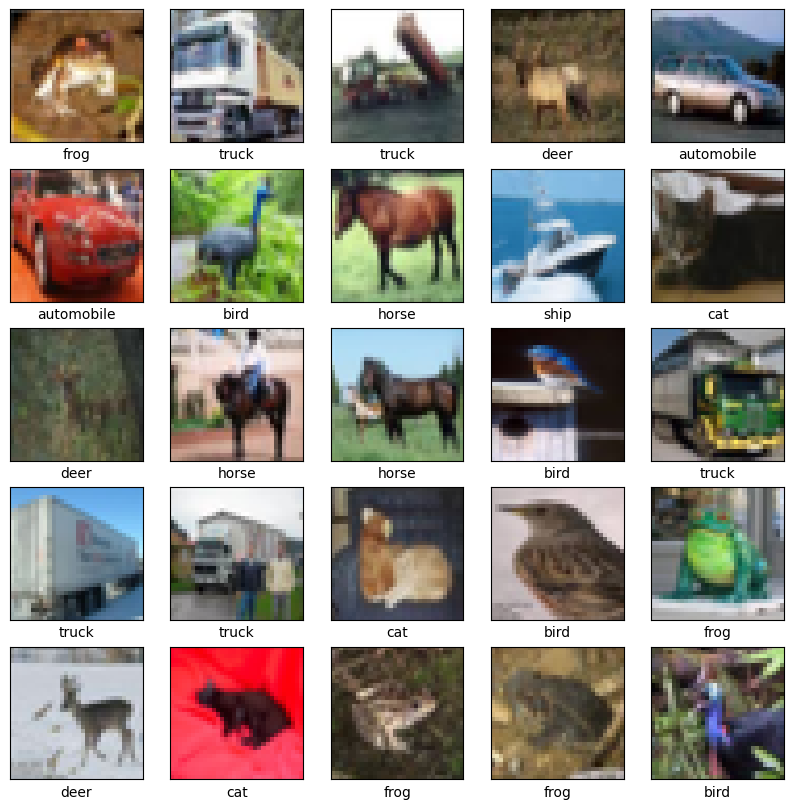

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN

#### Langkah 4.1. - Buat Layer Konvolusi

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\HANIF FAISHAL HILMI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Langkah 4.5. - Compile Model CNN

In [24]:
model.compile(optimizer='adam',
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Langkah 5 - Fit Model

In [25]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.4499 - loss: 1.5049 - val_accuracy: 0.5359 - val_loss: 1.2846
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.5987 - loss: 1.1336 - val_accuracy: 0.6368 - val_loss: 1.0327
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6561 - loss: 0.9755 - val_accuracy: 0.6582 - val_loss: 0.9596
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6951 - loss: 0.8720 - val_accuracy: 0.6712 - val_loss: 0.9550
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7207 - loss: 0.7948 - val_accuracy: 0.6969 - val_loss: 0.8777
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7418 - loss: 0.7350 - val_accuracy: 0.6982 - val_loss: 0.8724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7606 - loss: 0.6824 - val_accuracy: 0.7062 - val_loss: 0.8516
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7759 - l

### Langkah 6 - Evaluasi Model

313/313 - 1s - 2ms/step - accuracy: 0.7093 - loss: 0.8776


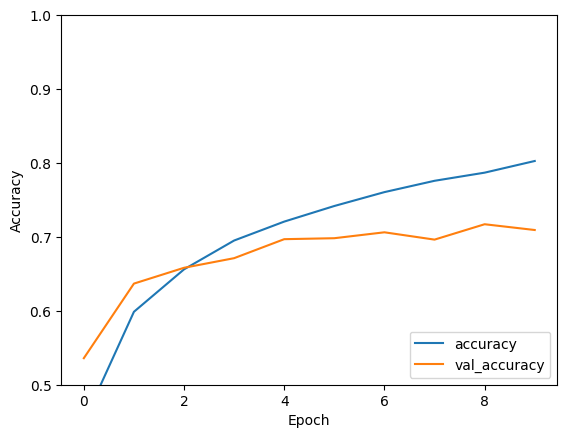

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

In [28]:
print(test_acc)

0.7092999815940857


## Tugas Lab

* Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

Import library dan dataset

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Normalisasi data

In [31]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Menambah data augmentasi

In [32]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


Membuat model CNN

In [33]:
model = models.Sequential([
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Me-compile model

In [34]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Melatih model

In [35]:
history = model.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 230s 285ms/step - accuracy: 0.4006 - loss: 1.7534 - val_accuracy: 0.5047 - val_loss: 1.3550
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.5388 - loss: 1.2898 - val_accuracy: 0.5524 - val_loss: 1.3501
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5984 - loss: 1.1334 - val_accuracy: 0.6491 - val_loss: 0.9922
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6364 - loss: 1.0388 - val_accuracy: 0.6720 - val_loss: 0.9722
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6624 - loss: 0.9686 - val_accuracy: 0.6650 - val_loss: 1.0024
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.6834 - loss: 0.9138 - val_accuracy: 0.6117 - val_loss: 1.1617
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.6981 - loss: 0.8712 - val_accuracy: 0.7333 - val_loss: 0.7992
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.7099 - loss: 0.8379 

Visualisasi plot

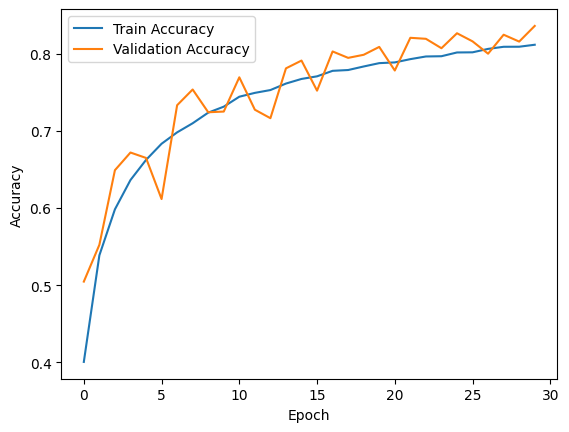

In [36]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluasi

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n✅ Akurasi Test: {test_acc*100:.2f}%")

313/313 - 3s - 10ms/step - accuracy: 0.8361 - loss: 0.4972

✅ Akurasi Test: 83.61%


* Buatlah model CNN untuk klasifikasi dataset MNIST.

Import libary dan load dataset

In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalisasi (ubah nilai piksel dari 0–255 jadi 0–1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Tambahkan dimensi channel (karena CNN butuh format (height, width, channels))
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Cek bentuk data
print("Train shape:", train_images.shape)
print("Test shape:", test_images.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


Visualisasi contoh gambar

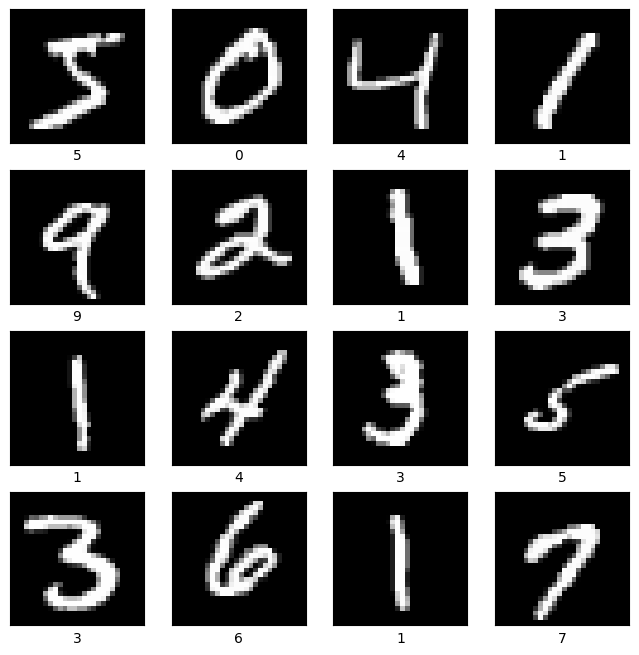

In [39]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()


Membuat model CNN

In [40]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()


c:\Users\HANIF FAISHAL HILMI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

Compile Model

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Train Model

In [42]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9556 - loss: 0.1533 - val_accuracy: 0.9860 - val_loss: 0.0443
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9823 - loss: 0.0637 - val_accuracy: 0.9875 - val_loss: 0.0404
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9865 - loss: 0.0467 - val_accuracy: 0.9887 - val_loss: 0.0367
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9894 - loss: 0.0362 - val_accuracy: 0.9892 - val_loss: 0.0327
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9902 - loss: 0.0335 - val_accuracy: 0.9925 - val_loss: 0.0270
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9916 - loss: 0.0300 - val_accuracy: 0.9910 - val_loss: 0.0289
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9928 - loss: 0.0242 - val_accuracy: 0.9921 - val_loss: 0.0289
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9941 - loss: 0.0215 - 

Plot hasil training

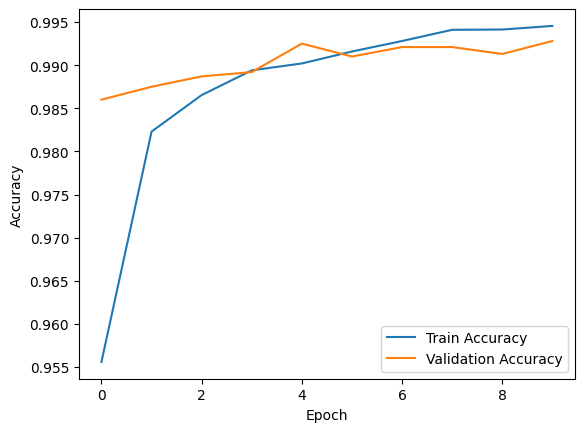

In [43]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Evaluasi akurasi dengan test set

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n✅ Akurasi di data test: {test_acc*100:.2f}%")


313/313 - 1s - 4ms/step - accuracy: 0.9928 - loss: 0.0273

✅ Akurasi di data test: 99.28%


Prediksi gambar

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


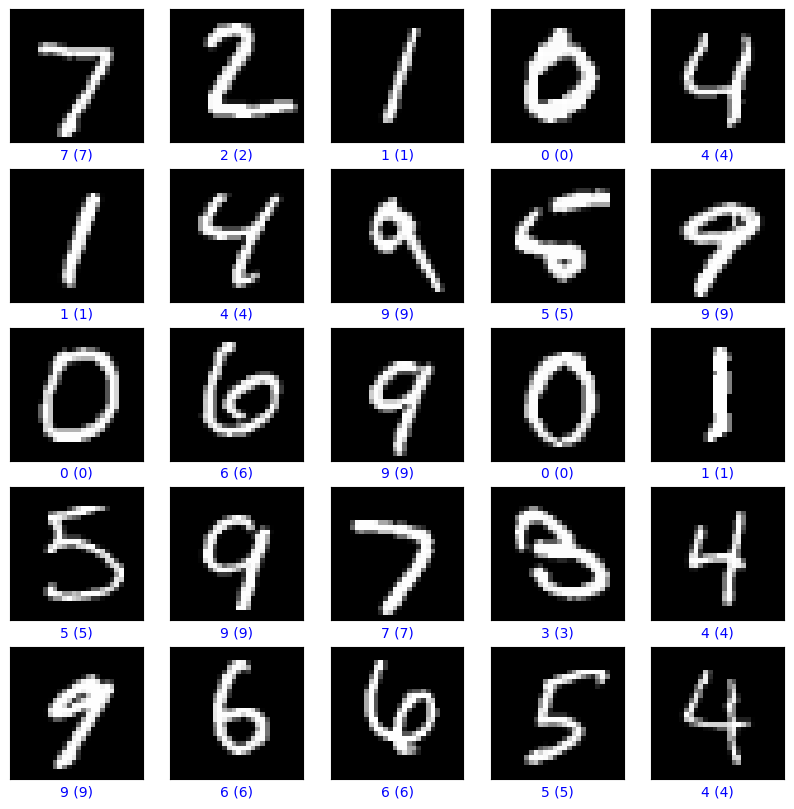

In [45]:
import numpy as np

predictions = model.predict(test_images)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()
